In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    
    even = fft(x[0::2])
    odd = fft(x[1::2]) 
    
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N//2)]
    
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

In [4]:
N = 256 
t = np.linspace(0, 1, N)
f1, f2 = 10, 10

sin_signal = np.sin(2 * np.pi * f1 * t)
cos_signal = np.cos(2 * np.pi * f2 * t)

In [5]:
fft_sin = fft(sin_signal)
fft_cos = fft(cos_signal)

fft_sin_norm = np.abs(fft_sin)[:N//2] / np.max(np.abs(fft_sin)[:N//2])
fft_cos_norm = np.abs(fft_cos)[:N//2] / np.max(np.abs(fft_cos)[:N//2])

freq = np.fft.fftfreq(N)

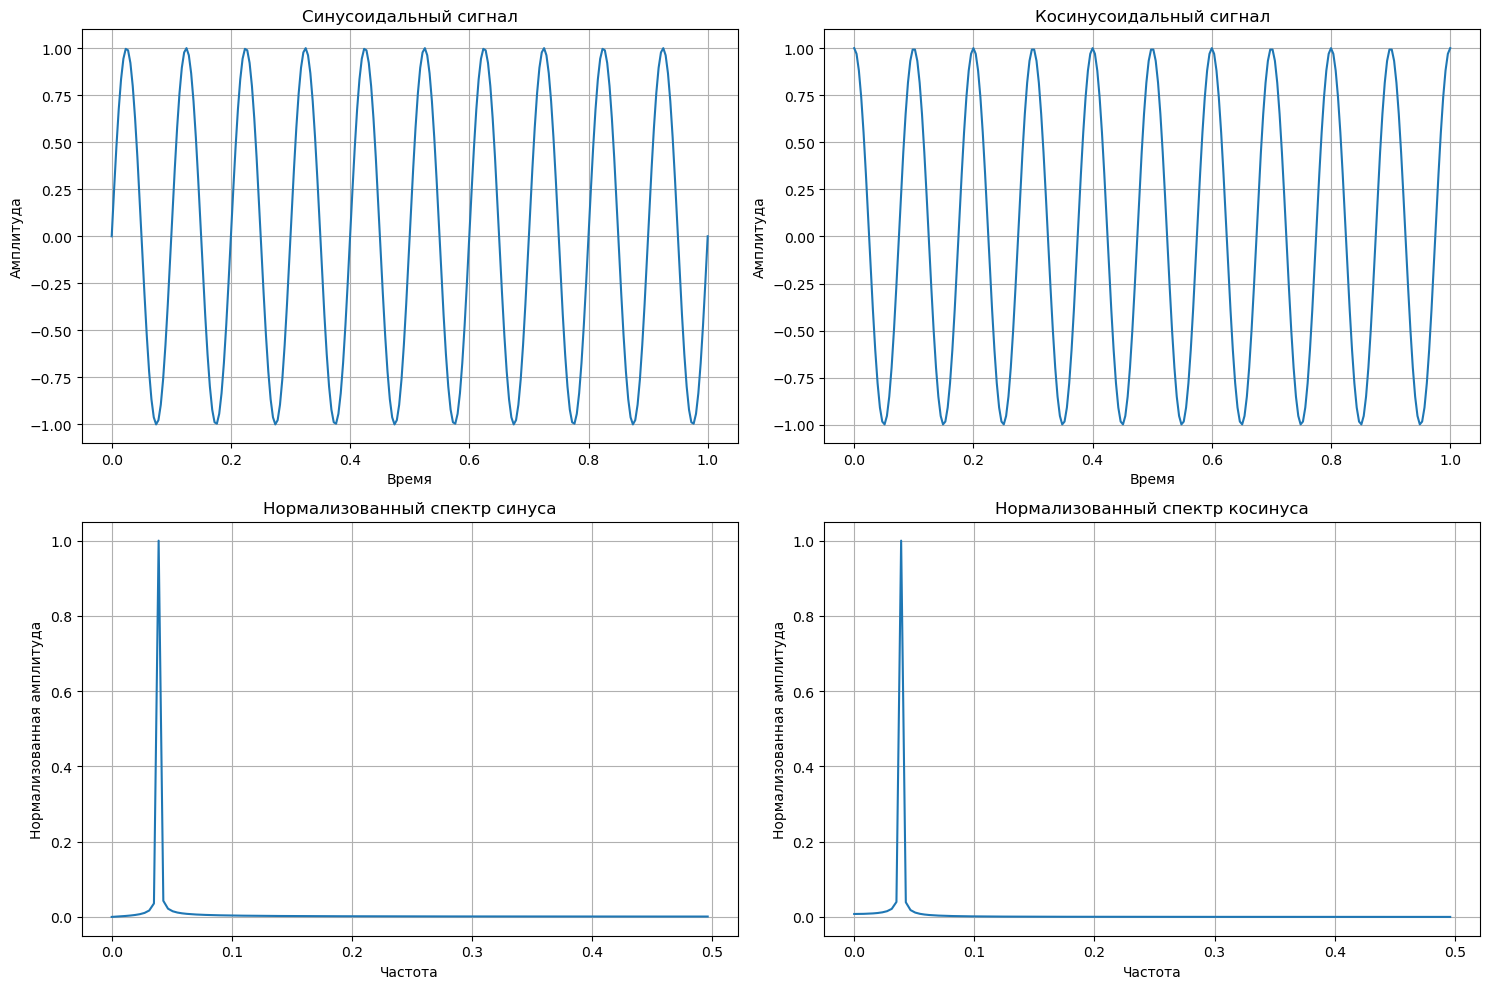

In [6]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(t, sin_signal)
plt.title('Синусоидальный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, cos_signal)
plt.title('Косинусоидальный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(freq[:N//2], fft_sin_norm)
plt.title('Нормализованный спектр синуса')
plt.xlabel('Частота')
plt.ylabel('Нормализованная амплитуда')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(freq[:N//2], fft_cos_norm)
plt.title('Нормализованный спектр косинуса')
plt.xlabel('Частота')
plt.ylabel('Нормализованная амплитуда')
plt.grid(True)

plt.tight_layout()
plt.show()